In [16]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns 

### Implementations

In [101]:
def euler_method(f, y0, t):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        h = (t[i] - t[i-1])
        y[i] = y[i-1] + f(y[i-1], t[i-1]) * h
    return y

def heun_method(f, y0, t):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        h = (t[i] - t[i-1])
        k1 = f(y[i-1], t[i-1])
        k2 = f(y[i-1] + k1 * h, t[i])
        y[i] = y[i-1] + (k1 + k2) * h / 2
    return y

def kutta_order_3(f, y0, t):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        h = (t[i] - t[i-1])
        k1 = f(y[i-1], t[i-1])
        k2 = f(y[i-1] + k1 * h / 2, t[i-1] + h / 2)
        k3 = f(y[i-1] - k1 * h + 2 * k2 * h, t[i])
        y[i] = y[i-1] + (k1 + 4 * k2 + k3) * h / 6
    return y

def runge_kutta_order_4(f, y0, t):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        h = (t[i] - t[i-1])
        k1 = f(y[i-1], t[i-1])
        k2 = f(y[i-1] + k1 * h / 2, t[i-1] + h / 2)
        k3 = f(y[i-1] + k2 * h / 2, t[i-1] + h / 2)
        k4 = f(y[i-1] + k3 * h, t[i])
        y[i] = y[i-1] + (k1 + 2 * k2 + 2 * k3 + k4) * h / 6
    return y

def runge_kutta_bi(f, g, y0, z0, t):
    y = np.zeros(len(t))
    z = np.zeros(len(t))
    y[0] = y0
    z[0] = z0
    for i in range(1, len(t)):
        h = (t[i] - t[i-1])
        k1 = f(y[i-1], z[i-1], t[i-1])
        l1 = g(y[i-1], z[i-1], t[i-1])
        k2 = f(y[i-1] + k1 * h / 2, z[i-1] + l1 * h / 2, t[i-1] + h / 2)
        l2 = g(y[i-1] + k1 * h / 2, z[i-1] + l1 * h / 2, t[i-1] + h / 2)
        k3 = f(y[i-1] + k2 * h / 2, z[i-1] + l2 * h / 2, t[i-1] + h / 2)
        l3 = g(y[i-1] + k2 * h / 2, z[i-1] + l2 * h / 2, t[i-1] + h / 2)
        k4 = f(y[i-1] + k3 * h, z[i-1] + l3 * h, t[i-1] + h)
        l4 = g(y[i-1] + k3 * h, z[i-1] + l3 * h, t[i-1] + h)
        y[i] = y[i-1] + (k1 + 2 * k2 + 2 * k3 + k4) * h / 6
        z[i] = z[i-1] + (l1 + 2 * l2 + 2 * l3 + l4) * h / 6
    return y, z


## Experiments

In [114]:
def F_1(x, t):
    return t**2-x**2

def f_2(x, y, A = -1, B = -1, C= 1, D = 1):
    return -A*np.log(x) + B*y + C*np.log(y) - D*y

def F_2x(x, y, A = -1, B = -1, C= 1, D = 1):
    return -C/x + D

def F_2y(x, y, A = -1, B = -1, C= 1, D = 1):
    return -A/x + B

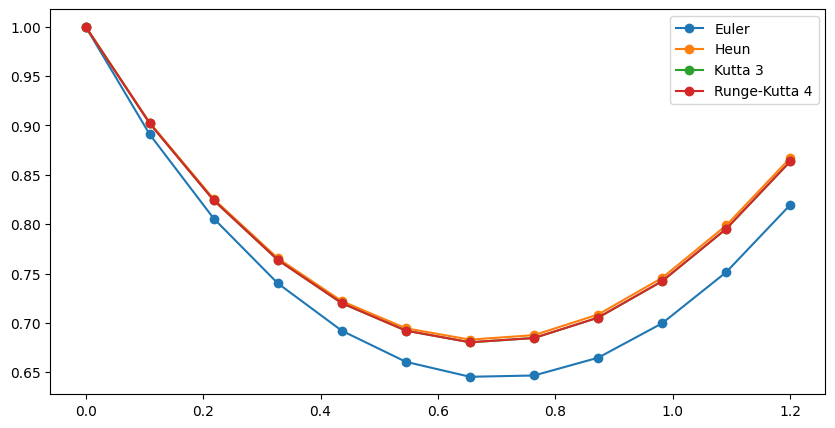

In [60]:
t_1 = np.linspace(0, 1.2, 12)
y_1_euler = euler_method(F_1, 1, t_1)
y_1_heun = heun_method(F_1, 1, t_1)
y_1_kutta = kutta_order_3(F_1, 1, t_1)
y_1_runge = runge_kutta_order_4(F_1, 1, t_1)

f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(t_1, y_1_euler, 'o-', label='Euler')
ax.plot(t_1, y_1_heun, 'o-', label='Heun')
ax.plot(t_1, y_1_kutta, 'o-', label='Kutta 3')
ax.plot(t_1, y_1_runge, 'o-', label='Runge-Kutta 4')
ax.legend()
plt.show()

In [131]:
y_2 = np.linspace(1, 6, 100)
x_2_runge = runge_kutta_order_4(F_2x, 1, y_2)

In [132]:
x_2_runge

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

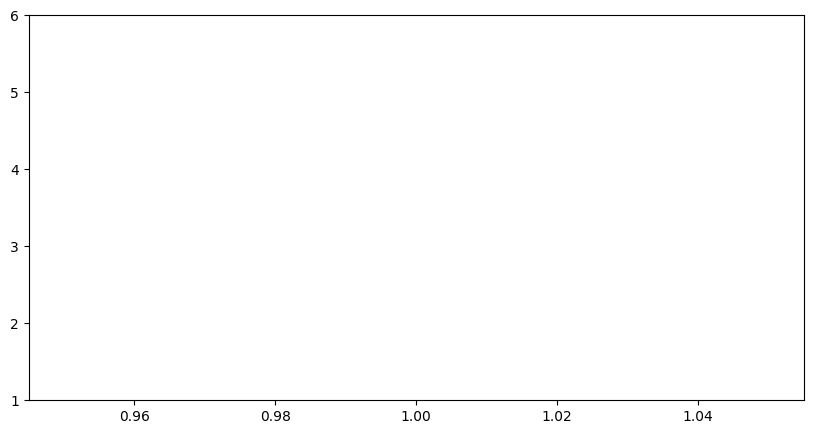

In [134]:
# level curves

x = x_2_runge
y = y_2
X, Y = np.meshgrid(x, y)
Z = f_2(X, Y)

f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.contour(X, Y, Z, levels=20)
plt.show()